## Credit Card Fraud Detection: Finding Outliers via Isolation Forest 

### Content

Dataset & description below was obtained from [Kaggle](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods/data)

_The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions._

_It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data._ 

**Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

**Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.**

**Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.** 

**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sample_with_outliers = pd.read_csv('creditcard.csv')

In [3]:
sample_with_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

In [4]:
sample_with_outliers.shape

(284807, 31)

In [5]:
sample_with_outliers.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
sample_with_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df = sample_with_outliers.drop(['Time'], axis=1)

In [8]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [9]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [10]:
def plot_boxplots(df):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 17))
    fig.suptitle('Features vs Class\n', size=18)

    features = ['V17', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11', 'V4']
    colors = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples', 'YlOrBr', 'YlGnBu', 'PuBuGn', 'BuGn']

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.boxplot(ax=axes[row, col], data=df, x='Class', y=feature, palette=colors[i])
        axes[row, col].set_title(f"{feature} distribution");

    plt.tight_layout()


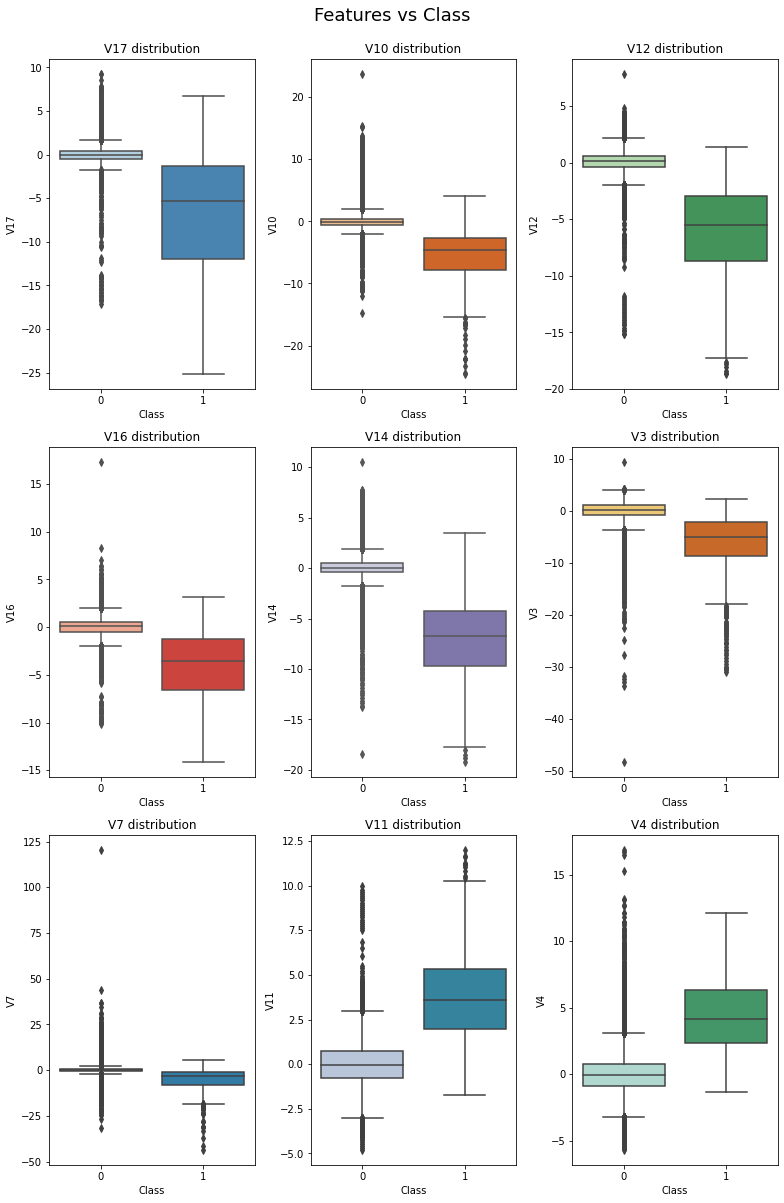

In [11]:
plot_boxplots(df)


In [38]:
def plot_hist_features(df, features):
    """
    Plots histograms of specified features grouped by the Class column of the DataFrame
    
    Args:
    - df: pandas DataFrame containing the data
    - features: list of strings, names of the features to plot
    
    Returns:
    - None
    """
    nrows = len(features) // 3 + (len(features) % 3 > 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(13, 8))
    fig.suptitle('Distribution of Classes\n', size=18)

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(df[feature], bins=60, linewidth=0.5, edgecolor="white")
        axes[row, col].set_title(f"{feature} distribution")
    
    plt.tight_layout()


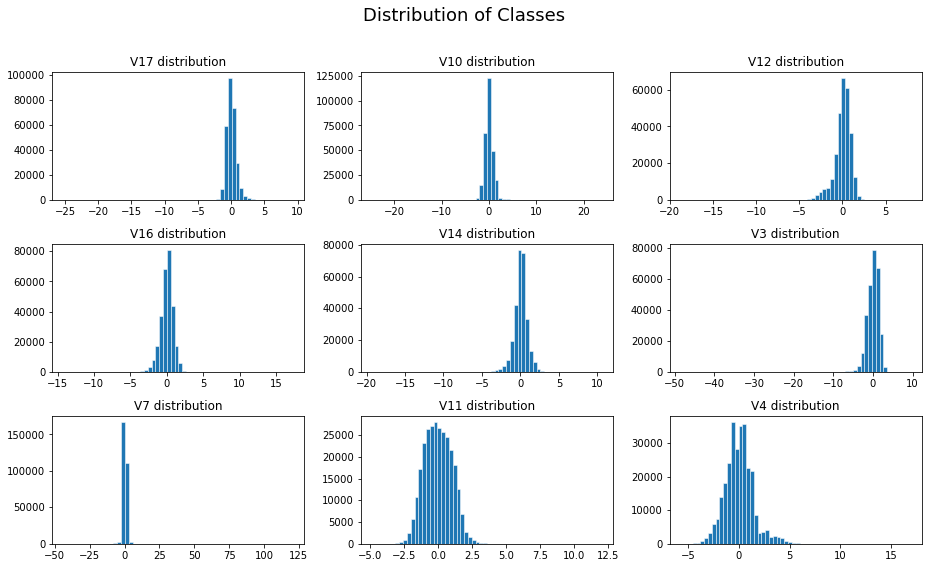

In [41]:
plot_hist_features(df, ['V17', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11', 'V4'])

In [14]:
df2 = df.drop(['Class'], axis=1)

In [15]:
%%time

model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

C:\Users\miche\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


CPU times: total: 17.2 s
Wall time: 17.2 s


IsolationForest(contamination=0.1, n_estimators=150)

In [16]:
scores = model.decision_function(df2)
anomaly = model.predict(df2)

df2['scores'] = scores
df2['anomaly'] = anomaly

df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.075650,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.093158,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.018775,-1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.050618,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.068084,1


In [17]:
anomaly = df2.loc[df2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 28481


In [35]:
28481/284807

0.10000105334489671

In [19]:
df2[df2['anomaly']==-1].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.018775,-1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.025494,-1
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,-0.047245,-1
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,-0.086302,-1
69,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,...,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,-0.000051,-1


In [20]:
df2[df2['anomaly']==-1].tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
284765,-2.433477,2.859978,-1.714267,-1.964427,1.070515,-1.098247,1.814726,-0.508294,1.980996,3.714089,...,0.781494,-0.167831,0.682687,0.110603,-0.020888,0.752567,-0.029560,0.77,-0.015184,-1
284772,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,2.769699,...,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,-0.046920,-1
284774,-0.725459,0.194981,-1.785571,-3.779860,2.177420,2.975713,-0.239695,0.912303,-3.159994,0.952958,...,0.102480,-0.461027,0.717647,1.253036,0.207138,-0.630549,-0.163911,7.00,-0.010407,-1
284795,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,-0.212240,-1
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-0.181857,-1


In [21]:
drop_outliers = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

### Plot distributions after dropping outliers 

After removing outliers, plotting the distribution of a feature can help to assess its normality, identify potential data skewness, and determine the presence of any remaining outliers or anomalies. This information can be valuable in selecting appropriate statistical tests, models, or feature engineering strategies that rely on assumptions about the distribution of the data.

In [33]:
def plot_hist_features(drop_outliers, features):
    """
    Plots histograms of specified features grouped by the Class column of the DataFrame
    
    Args:
    - drop_outliers: pandas DataFrame containing the data
    - features: list of strings, names of the features to plot
    
    Returns:
    - None
    """
    nrows = len(features) // 3 + (len(features) % 3 > 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(13, 8))
    fig.suptitle('Distribution of Classes\nafter applying Isolation Forest technique', size=18)

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(drop_outliers[feature], bins=60, linewidth=0.5, edgecolor="white")
        axes[row, col].set_title(f"{feature} distribution")
    
    plt.tight_layout()

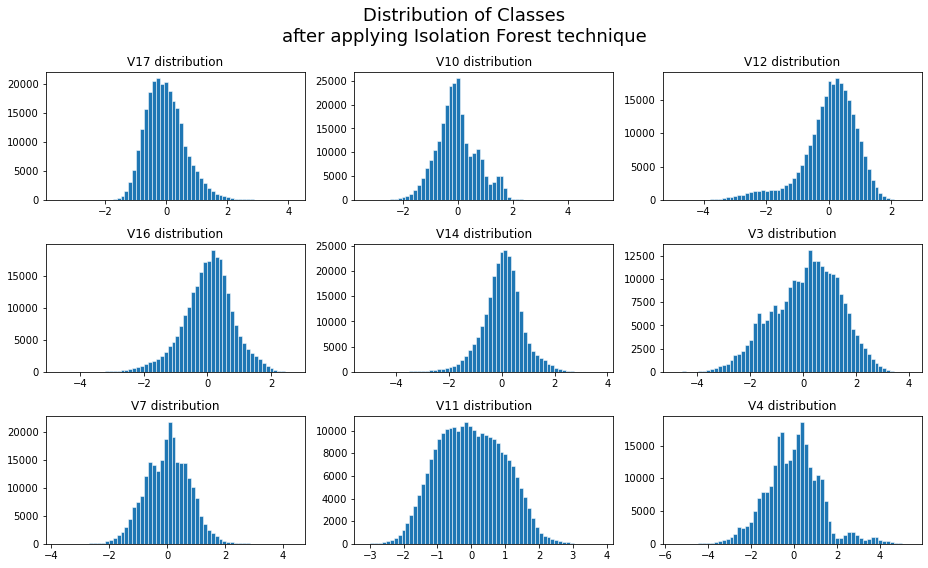

In [34]:
plot_hist_features(drop_outliers, ['V17', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11', 'V4'])